#### Import nibabel package to read NIfTI images

In [2]:
from nibabel.testing import data_path
import numpy as np
import tensorflow as tf
from keras import applications
import nibabel as nib
import keras

#### Enable GPU

In [2]:
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)


#### Check the GPU 

In [3]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9735628767886619574
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 105923996741610659
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 1285804040333629308
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11579215053
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18341216715057400559
physical_device_desc: "device: 0, name: TITAN Xp, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


#### Import all the Keras required library 

In [4]:
import matplotlib.pyplot as plt
import glob
from keras.losses import categorical_crossentropy
from keras.models import Sequential, Model 
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras import layers

from sklearn.model_selection import train_test_split

#### Fatch all the preprocessed images from the folder , preprocessing is done in SPM (matlab)

In [5]:
Adni_normal_6_months=glob.glob('/home/kushpal/Kushpal/ADNI_Normal/Normal-m06-3.0T(27)/[0-9]*/*/*/*/w*')
Adni_normal_12_months=glob.glob('/home/kushpal/Kushpal/ADNI_Normal/Normal-m12-3.0T(27)/[0-9]*/*/*/*/w*')
Adni_normal_24_months=glob.glob('/home/kushpal/Kushpal/ADNI_Normal/Normal-m24-3.0T(27)/[0-9]*/*/*/*/w*')
Adni_normal_36_months=glob.glob('/home/kushpal/Kushpal/ADNI_Normal/Normal-m36-3.0T(27)/[0-9]*/*/*/*/w*')

Mci_bl_3_months=glob.glob('/home/kushpal/Kushpal/MCI/MCI-bl-3.0T (22)/[0-9]*/*/*/*/w*')
Mci_6_months=glob.glob('/home/kushpal/Kushpal/MCI/MCI-m06-3.0T (22)/[0-9]*/*/*/*/w*')
Mci_12_months=glob.glob('/home/kushpal/Kushpal/MCI/MCI-m12-3.0T (22)/[0-9]*/*/*/*/w*')
Mci_24_months=glob.glob('/home/kushpal/Kushpal/MCI/MCI-m24-3.0T (22)/[0-9]*/*/*/*/w*')
Mci_36_months=glob.glob('/home/kushpal/Kushpal/MCI/MCI-m36-3.0T (22)/[0-9]*/*/*/*/w*')

Ad_bl_3_months=glob.glob('/home/kushpal/Kushpal/AD-bl-3.0T(22)/[0-9]*/*/*/*/w*')
Ad_6_months=glob.glob('/home/kushpal/Kushpal/AD-m06-3.0T(22)/[0-9]*/*/*/*/w*')
Ad_12_months=glob.glob('/home/kushpal/Kushpal/AD-m12-3.0T(22)/[0-9]*/*/*/*/w*')
Ad_24_months=glob.glob('/home/kushpal/Kushpal/AD-m24-3.0T(22)/[0-9]*/*/*/*/w*')


#### Label all the images with the corresponding categories (0, 1,2), 0 = CN, 1 = MCI, 2 = AD.

In [6]:
Adni_normal_image_X=[]
Adni_normal_image_Y=[]
for i in range(len(Adni_normal_6_months)):
    newimg = nib.load(Adni_normal_6_months[i])
    data = newimg.get_data()
    Adni_normal_image_X.append(data)
    Adni_normal_image_Y.append(0)
for i in range(len(Adni_normal_12_months)):
    newimg = nib.load(Adni_normal_12_months[i])
    data = newimg.get_data()
    Adni_normal_image_X.append(data)
    Adni_normal_image_Y.append(0)
    
for i in range(len(Adni_normal_24_months)):
    newimg = nib.load(Adni_normal_24_months[i])
    data = newimg.get_data()
    Adni_normal_image_X.append(data)
    Adni_normal_image_Y.append(0)
for i in range(len(Adni_normal_36_months)):
    newimg = nib.load(Adni_normal_36_months[i])
    data = newimg.get_data()
    Adni_normal_image_X.append(data)
    Adni_normal_image_Y.append(0)


Mci_image_X=[]
Mci_image_Y=[]
for i in range(len(Mci_bl_3_months)):
    newimg = nib.load(Mci_bl_3_months[i])
    data = newimg.get_data()
    Mci_image_X.append(data)
    Mci_image_Y.append(1)
for i in range(len(Mci_6_months)):
    newimg = nib.load(Mci_6_months[i])
    data = newimg.get_data()
    Mci_image_X.append(data)
    Mci_image_Y.append(1)
for i in range(len(Mci_12_months)):
    newimg = nib.load(Mci_12_months[i])
    data = newimg.get_data()
    Mci_image_X.append(data)
    Mci_image_Y.append(1)
    
for i in range(len(Mci_24_months)):
    newimg = nib.load(Mci_24_months[i])
    data = newimg.get_data()
    Mci_image_X.append(data)
    Mci_image_Y.append(1)
    
for i in range(len(Mci_36_months)):
    newimg = nib.load(Mci_36_months[i])
    data = newimg.get_data()
    Mci_image_X.append(data)
    Mci_image_Y.append(1)


Ad_image_X=[]
Ad_image_Y=[]
for i in range(len(Ad_bl_3_months)):
    newimg = nib.load(Ad_bl_3_months[i])
    data = newimg.get_data()
    Ad_image_X.append(data)
    Ad_image_Y.append(2)
for i in range(len(Ad_6_months)):
    newimg = nib.load(Ad_6_months[i])
    data = newimg.get_data()
    Ad_image_X.append(data)
    Ad_image_Y.append(2)
for i in range(len(Ad_12_months)):
    newimg = nib.load(Ad_12_months[i])
    data = newimg.get_data()
    Ad_image_X.append(data)
    Ad_image_Y.append(2)
    
for i in range(len(Ad_24_months)):
    newimg = nib.load(Ad_24_months[i])
    data = newimg.get_data()
    Ad_image_X.append(data)
    Ad_image_Y.append(2)

In [7]:
Total_data_X=[]
Total_data_Y=[]
for i in range(len(Adni_normal_image_X)):
    Total_data_X.append(Adni_normal_image_X[i])
    Total_data_Y.append(Adni_normal_image_Y[i])
for i in range(len(Mci_image_X)):
    Total_data_X.append(Mci_image_X[i])
    Total_data_Y.append(Mci_image_Y[i])
for i in range(len(Ad_image_X)):
    Total_data_X.append(Ad_image_X[i])
    Total_data_Y.append(Ad_image_Y[i])

#### Total no of 3D images (303 X 121 X 145 X 121)

In [8]:
len(Total_data_X)

303

#### Data Conversion from 3D to 2D and introduce 3 channels (RGB) because the predefined model always takes 2D images with 3 channels in Keras.

In [9]:
Newdata=np.array(Total_data_X)
maindata=np.stack([Newdata]*3, axis=-1)

maindata=maindata.reshape(303*121,145,121,3)

#### Label all the converted images with their corresponding category.

In [10]:
new_y=[]
for i in range (len(Total_data_X)):
    for j in range(121):
        new_y.append(Total_data_Y[i])
new_y=np.array(new_y)

#### After the conversion of  3D images, total no of 2D images

In [11]:
maindata.shape,new_y.shape

((36663, 145, 121, 3), (36663,))

#### Split the data into train and test in the 70:30 ratio.

In [12]:



X_train, X_test, y_train, y_test = train_test_split(maindata, new_y, test_size=0.33)
X_train=np.array(X_train)
y_train=np.array(y_train)
x_train = X_train.reshape(X_train.shape[0], 145, 121, 3)

input_shape = (145, 121,3)
x_train = x_train.astype('float32')
y_train = keras.utils.to_categorical(y_train)
y_old_test=y_test
y_test = keras.utils.to_categorical(y_test)




#### Use the ResNet152 model. 

In [13]:

model = applications.ResNet152(weights = "imagenet", include_top=False, input_shape =input_shape)


# Freeze the layers which you don't want to train. Here I am not freezing any layer.
for layer in model.layers:
    layer.trainable = True
#Adding custom Layers 
x = model.output
x = Flatten()(x)
predictions = Dense(3, activation="softmax")(x)
model= Model(input = model.input, output = predictions)

Instructions for updating:
Colocations handled automatically by placer.


/home/kushpal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  # This is added back by InteractiveShellApp.init_path()


In [14]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 145, 121, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 151, 127, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 73, 61, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 73, 61, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

#### Compile and train the model with Adam optimizer

In [15]:
model.compile(keras.optimizers.Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
val=model.fit(x=x_train,y=y_train,batch_size=60, epochs=50,validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 22107 samples, validate on 2457 samples
Epoch 1/50
22107/22107 [==============================] - 201s 9ms/step - loss: 1.0305 - acc: 0.5340 - val_loss: 0.7011 - val_acc: 0.6862
Epoch 2/50
22107/22107 [==============================] - 152s 7ms/step - loss: 0.4748 - acc: 0.7750 - val_loss: 0.5106 - val_acc: 0.7566
Epoch 3/50
22107/22107 [==============================] - 154s 7ms/step - loss: 0.3473 - acc: 0.8282 - val_loss: 0.4208 - val_acc: 0.7900
Epoch 4/50
22107/22107 [==============================] - 154s 7ms/step - loss: 0.3017 - acc: 0.8434 - val_loss: 0.3982 - val_acc: 0.8030
Epoch 5/50
22107/22107 [==============================] - 155s 7ms/step - loss: 0.2762 - acc: 0.8547 - val_loss: 0.3618 - val_acc: 0.8164
Epoch 6/50
22107/22107 [==============================] - 155s 7ms/step - loss: 0.2635 - acc: 0.8588 - val_loss: 0.3708 - val_acc: 0.8201
Epoch 7/50
22107/22107 [==============================] - 154s 7ms/step - l

#### The model loss and accuracy on test data. 

In [21]:
X_test=np.array(X_test)
x_test = X_test.reshape(X_test.shape[0],145,121,3)
x_test = x_test.astype('float32')
    # Normalizing the RGB codes by dividing it to the max RGB value.
print('Number of images in x_test', x_test.shape[0])
model.evaluate(x_test,y_test)


Number of images in x_test 12099
12099/12099 [==============================] - 29s 2ms/step


[0.35156932543876673, 0.8394908670138028]

Text(0, 0.5, 'Accuracy')

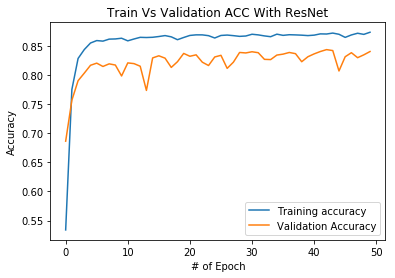

In [22]:
plt.plot(val.history['acc'])
plt.plot(val.history['val_acc'])
plt.legend(['Training accuracy' ,'Validation Accuracy'])
plt.title("Train Vs Validation ACC With ResNet")
plt.xlabel("# of Epoch")
plt.ylabel("Accuracy")